In [1]:
import sys

In [2]:
sys.path.append("..")

In [3]:
from hpst.dataset.bbox_mask_dataset import BboxMaskDataset
import torch
import torchvision.transforms.functional as F
import numpy as np
import matplotlib.patches as patches

In [4]:
dataset = BboxMaskDataset("../data/preprocessed_nova_miniprod6_1_cvnlabmaps.h5")

In [5]:
hits_index, (features_x, targets_x), (features_y, targets_y) = dataset[641]

In [6]:
dataset.bbox_offsets.max()

tensor(71647180)

In [7]:
dataset.bbox_offsets

tensor([       0,       23,       36,  ..., 71647171, 71647177, 71647180])

In [8]:
dataset.bbox_y.shape

torch.Size([71647180, 4])

In [9]:
hits_index

641

In [10]:
dataset.hitlim_lo

tensor([        0,       412,       446,  ..., 647444961, 647445330,
        647445418])

In [11]:
import matplotlib.pyplot as plt

In [12]:
from torchvision.utils import draw_segmentation_masks, draw_bounding_boxes, make_grid

In [13]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [14]:
features_x = (256*(features_x - features_x.min()) / (features_x.max() - features_x.min())).to(torch.uint8)

In [15]:
features_y = (256*(features_y - features_y.min()) / (features_y.max() - features_y.min())).to(torch.uint8)

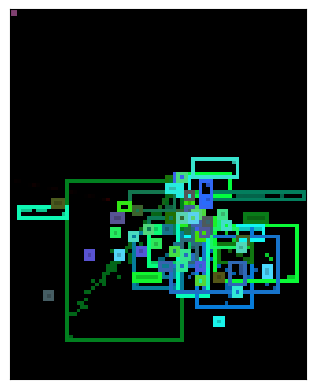

In [16]:
results = draw_bounding_boxes(draw_segmentation_masks(features_x, masks=targets_x["masks"].to(torch.bool)), targets_x["boxes"])
show(results)

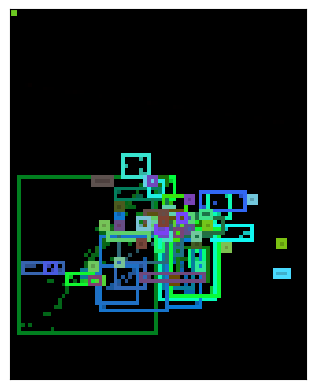

In [17]:
results = draw_bounding_boxes(draw_segmentation_masks(features_y, masks=targets_y["masks"].to(torch.bool)), targets_y["boxes"])
show(results)

In [18]:
item = 0
event_low = dataset.hitlim_lo[item]
event_high = dataset.hitlim_hi[item]

In [19]:
coordinates = torch.Tensor(dataset.coordinates[event_low:event_high]).clone()
hitview = torch.Tensor(dataset.hitview[event_low:event_high]).clone()
object_targets = torch.Tensor(dataset.object_targets[event_low:event_high]).clone()

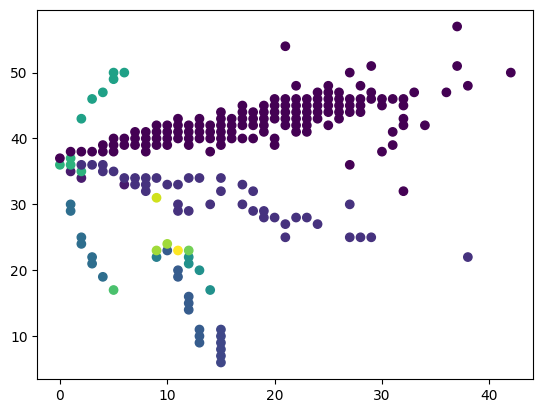

In [20]:
plt.scatter(coordinates[hitview == 0].numpy()[:,0], coordinates[hitview == 0].numpy()[:,1], c=object_targets[hitview == 0])

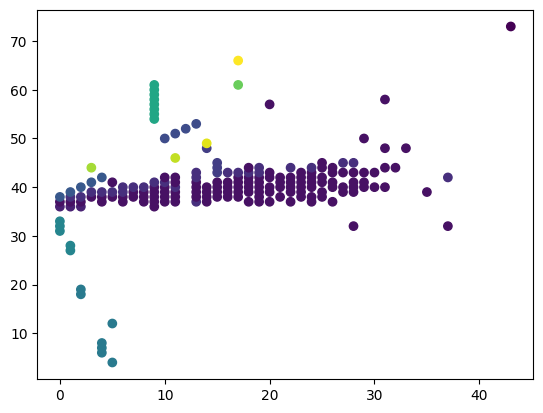

In [21]:
plt.scatter(coordinates[hitview == 1].numpy()[:,0], coordinates[hitview == 1].numpy()[:,1], c=object_targets[hitview == 1])

In [22]:
targets_x["masks"].argmax(dim=0).unique()

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
        55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
        73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90])

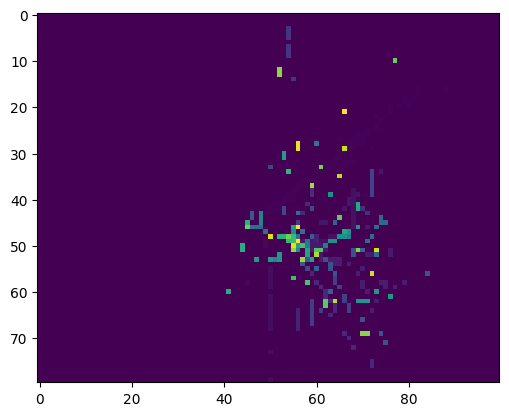

In [23]:
plt.imshow(targets_x["masks"].argmax(dim=0).T)

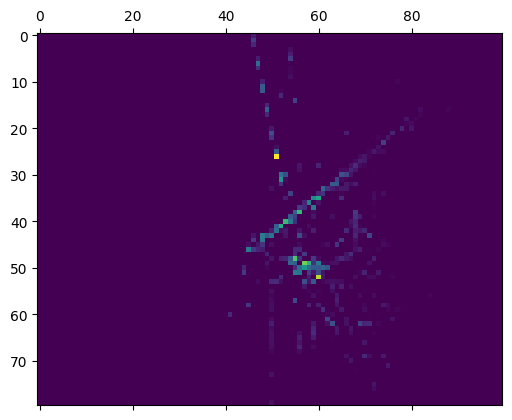

In [24]:
plt.matshow(features_x[0].T)

In [25]:
features_x.shape

torch.Size([3, 100, 80])

In [26]:
targets_x["boxes"][targets_x["labels"] != 0]

tensor([[15., 46., 46., 89.],
        [48., 44., 59., 50.],
        [54., 49., 79., 51.],
        [37., 60., 50., 69.],
        [33., 60., 46., 75.],
        [45., 56., 53., 77.],
        [50., 58., 65., 80.],
        [47., 59., 50., 61.],
        [63., 55., 69., 57.],
        [55., 58., 77., 73.],
        [37., 56., 44., 60.],
        [38., 58., 40., 60.],
        [41., 69., 44., 72.],
        [ 2., 53., 15., 56.],
        [44., 55., 46., 57.],
        [61., 58., 68., 62.],
        [56., 63., 65., 68.],
        [33., 71., 40., 73.],
        [32., 49., 44., 54.],
        [54., 57., 56., 59.],
        [41., 58., 43., 60.],
        [50., 67., 53., 69.],
        [52., 61., 72., 76.],
        [55., 83., 57., 85.],
        [42., 45., 45., 47.],
        [52., 56., 55., 59.],
        [47., 58., 49., 60.],
        [54., 59., 61., 64.],
        [44., 63., 46., 65.],
        [51., 72., 53., 74.],
        [43., 69., 52., 76.],
        [45., 45., 48., 50.],
        [42., 55., 44., 57.],
        [4

In [27]:
targets_x["boxes"]

tensor([[ 0., 45., 33., 53.],
        [15., 46., 46., 89.],
        [48., 44., 59., 50.],
        [54., 49., 79., 51.],
        [37., 60., 50., 69.],
        [33., 60., 46., 75.],
        [45., 56., 53., 77.],
        [50., 58., 65., 80.],
        [47., 59., 50., 61.],
        [63., 55., 69., 57.],
        [55., 58., 77., 73.],
        [37., 56., 44., 60.],
        [38., 58., 40., 60.],
        [41., 69., 44., 72.],
        [ 2., 53., 15., 56.],
        [44., 55., 46., 57.],
        [61., 58., 68., 62.],
        [56., 63., 65., 68.],
        [33., 71., 40., 73.],
        [32., 49., 44., 54.],
        [54., 57., 56., 59.],
        [41., 58., 43., 60.],
        [50., 67., 53., 69.],
        [52., 61., 72., 76.],
        [55., 83., 57., 85.],
        [42., 45., 45., 47.],
        [52., 56., 55., 59.],
        [47., 58., 49., 60.],
        [54., 59., 61., 64.],
        [44., 63., 46., 65.],
        [51., 72., 53., 74.],
        [43., 69., 52., 76.],
        [45., 45., 48., 50.],
        [4

In [28]:
targets_y["labels"].shape, targets_y["masks"].shape, targets_y["boxes"].shape

(torch.Size([128]), torch.Size([128, 100, 80]), torch.Size([128, 4]))

In [29]:
targets_x["masks"].argmax(dim=0).unique()

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
        55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
        73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90])

In [30]:
targets_y["masks"].argmax(dim=0).unique()

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  13,  14,
         15,  16,  17,  18,  19,  23,  25,  26,  27,  28,  29,  31,  32,  33,
         34,  35,  37,  45,  46,  47,  49,  51,  53,  55,  56,  58,  62,  63,
         66,  67,  72,  73,  74,  75,  84,  86,  91,  92,  93,  94,  95,  96,
         98,  99, 100, 101, 102, 103, 104, 105, 107, 109, 110, 111, 112, 113,
        114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127])

In [31]:
targets_x["boxes"]

tensor([[ 0., 45., 33., 53.],
        [15., 46., 46., 89.],
        [48., 44., 59., 50.],
        [54., 49., 79., 51.],
        [37., 60., 50., 69.],
        [33., 60., 46., 75.],
        [45., 56., 53., 77.],
        [50., 58., 65., 80.],
        [47., 59., 50., 61.],
        [63., 55., 69., 57.],
        [55., 58., 77., 73.],
        [37., 56., 44., 60.],
        [38., 58., 40., 60.],
        [41., 69., 44., 72.],
        [ 2., 53., 15., 56.],
        [44., 55., 46., 57.],
        [61., 58., 68., 62.],
        [56., 63., 65., 68.],
        [33., 71., 40., 73.],
        [32., 49., 44., 54.],
        [54., 57., 56., 59.],
        [41., 58., 43., 60.],
        [50., 67., 53., 69.],
        [52., 61., 72., 76.],
        [55., 83., 57., 85.],
        [42., 45., 45., 47.],
        [52., 56., 55., 59.],
        [47., 58., 49., 60.],
        [54., 59., 61., 64.],
        [44., 63., 46., 65.],
        [51., 72., 53., 74.],
        [43., 69., 52., 76.],
        [45., 45., 48., 50.],
        [4

In [32]:
targets_y["boxes"]

tensor([[ 2., 19., 79., 89.],
        [ 2., 45., 39., 87.],
        [40., 45., 44., 51.],
        [28., 48., 40., 51.],
        [48., 65., 52., 69.],
        [41., 61., 49., 75.],
        [40., 55., 55., 78.],
        [42., 62., 51., 80.],
        [44., 58., 48., 61.],
        [34., 55., 37., 57.],
        [43., 59., 56., 77.],
        [42., 56., 46., 59.],
        [ 0.,  0.,  1.,  1.],
        [19., 70., 21., 72.],
        [53., 49., 59., 56.],
        [28., 54., 30., 56.],
        [54., 58., 65., 62.],
        [45., 64., 53., 73.],
        [15., 71., 22., 74.],
        [38., 50., 42., 55.],
        [ 0.,  0.,  1.,  1.],
        [ 0.,  0.,  1.,  1.],
        [ 0.,  0.,  1.,  1.],
        [24., 61., 42., 81.],
        [ 0.,  0.,  1.,  1.],
        [39., 45., 42., 47.],
        [49., 55., 51., 57.],
        [42., 55., 54., 61.],
        [39., 61., 41., 65.],
        [44., 64., 46., 66.],
        [ 0.,  0.,  1.,  1.],
        [23., 69., 34., 79.],
        [37., 46., 41., 50.],
        [4

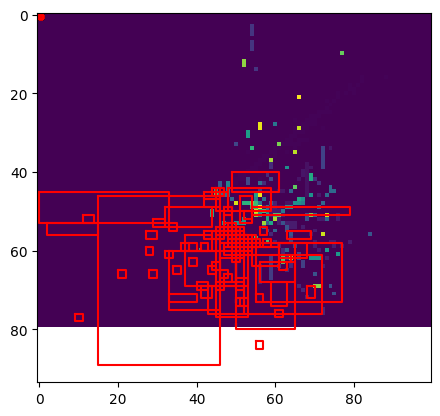

In [33]:
fig, ax = plt.subplots()
ax.imshow(targets_x["masks"].argmax(dim=0).T)
for box in targets_x["boxes"]:
    lo = box[:2]
    hi = box[2:]
    xs = [lo[0], hi[0], hi[0], lo[0], lo[0]]
    ys = [lo[1], lo[1], hi[1], hi[1], lo[1]]
    ax.plot(xs, ys, color="red")

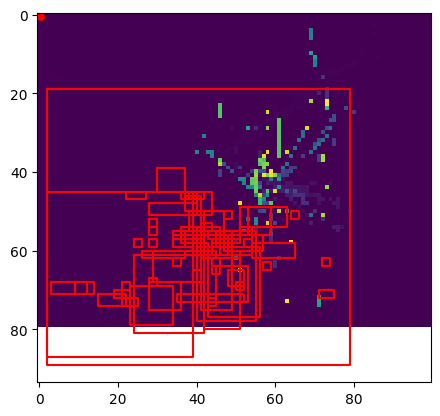

In [34]:
fig, ax = plt.subplots()
ax.imshow(targets_y["masks"].argmax(dim=0).T)
for box in targets_y["boxes"]:
    lo = box[:2]
    hi = box[2:]
    xs = [lo[0], hi[0], hi[0], lo[0], lo[0]]
    ys = [lo[1], lo[1], hi[1], hi[1], lo[1]]
    ax.plot(xs, ys, color="red")

In [35]:
dataset.hits_index

tensor([      0,       0,       0,  ..., 4623354, 4623354, 4623354])

In [36]:
num_segments = torch.zeros((dataset.hits_index.amax()+1,), dtype=dataset.object_targets.dtype).scatter_reduce_(dim=0, index=dataset.hits_index, src=dataset.object_targets, reduce="amax")

In [37]:
bbox_offsets = torch.zeros((num_segments.shape[0]+1,), dtype=num_segments.dtype)
torch.cumsum(num_segments, out=bbox_offsets[1:], dim=0)
bbox_offsets = bbox_offsets[:-1]

In [38]:
index_offsets_x = bbox_offsets[dataset.hits_index[dataset.hitview==0]]

In [39]:
object_target_index_x = index_offsets_x + dataset.object_targets[dataset.hitview==0]

In [40]:
bbox_min_x1 = torch.zeros((object_target_index_x.amax()+1,), dtype=dataset.coordinates.dtype) \
            .scatter_reduce_(dim=0, index=object_target_index_x, src=dataset.coordinates[dataset.hitview==0,0], reduce="amin", include_self=False)

In [41]:
bbox_min_x2 = torch.zeros((object_target_index_x.amax()+1,), dtype=dataset.coordinates.dtype) \
            .scatter_reduce_(dim=0, index=object_target_index_x, src=dataset.coordinates[dataset.hitview==0,1], reduce="amin", include_self=False)

In [42]:
bbox_max_x1 = torch.zeros((object_target_index_x.amax()+1,), dtype=dataset.coordinates.dtype) \
            .scatter_reduce_(dim=0, index=object_target_index_x, src=dataset.coordinates[dataset.hitview==0,0], reduce="amax", include_self=False)

In [43]:
bbox_max_x2 = torch.zeros((object_target_index_x.amax()+1,), dtype=dataset.coordinates.dtype) \
            .scatter_reduce_(dim=0, index=object_target_index_x, src=dataset.coordinates[dataset.hitview==0,1], reduce="amax", include_self=False)

In [44]:
item = 0
event_low = dataset.hitlim_lo[item]
event_high = dataset.hitlim_hi[item]

In [45]:
dataset.hits_index[(dataset.hitview == 0) & (dataset.hits_index == 0)]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0])

In [46]:
dataset.coordinates[(dataset.hitview == 0) & (dataset.hits_index == 0), 0]

tensor([ 0,  0,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,
         3,  3,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,
         6,  6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,
         9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11,
        11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13,
        13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15,
        15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17,
        17, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
        20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22,
        22, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25,
        25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28,
        28, 29, 29, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32, 32, 32, 32, 33, 34,
        36, 37, 37, 38, 38, 42])

In [47]:
dataset.object_targets[(dataset.hitview == 0) & (dataset.hits_index == 0)]

tensor([10,  1,  6,  6,  2, 10, 10,  1,  6,  6,  2, 10,  3,  1,  9,  6,  6,  3,
         1,  9,  6,  3,  3,  1,  1,  9, 11,  3,  1,  1,  1,  9,  9,  2,  3,  1,
         1,  9,  3,  3,  1,  1,  1,  3,  3,  3,  1,  1,  1,  1,  7, 13, 14,  3,
         1,  1,  1,  1,  5, 13,  3,  1,  1,  1,  1,  5,  5, 15,  3,  3,  3,  1,
         1,  1,  1,  5,  5,  5,  8,  8, 12,  3,  3,  1,  1,  1,  1,  5,  5,  5,
         8,  3,  1,  1,  1,  1,  8,  3,  1,  1,  1,  1,  4,  4,  4,  4,  4,  4,
         3,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  3,  1,  1,  1,  1,
         1,  3,  3,  1,  1,  1,  1,  3,  3,  1,  1,  1,  1,  1,  3,  1,  1,  1,
         1,  1,  1,  3,  3,  1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,  1,
         1,  3,  1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  3,  3,  1,  1,  1,  1,  1,  3,  1,  1,  1,
         1,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  3,  1,  1])

In [48]:
a = bbox_min_x1[bbox_offsets[1]:bbox_offsets[2]]-1
b = bbox_min_x2[bbox_offsets[1]:bbox_offsets[2]]-1
c = bbox_max_x1[bbox_offsets[1]:bbox_offsets[2]]+1
d = bbox_max_x2[bbox_offsets[1]:bbox_offsets[2]]+1

In [49]:
a,b,c,d

(tensor([-1,  3, 13,  8,  0,  1,  8,  0,  9, -1, -1, -1]),
 tensor([-1, 39, 25, 29, 39, 41, 31, 43, 30, 41, -1, -1]),
 tensor([ 1,  8, 15, 10,  2,  4, 10,  2, 11,  1,  1,  1]),
 tensor([ 1, 42, 27, 32, 41, 43, 33, 45, 32, 43,  1,  1]))

In [50]:
(dataset.bbox_x[:,0] < dataset.bbox_x[:,2]).all()

tensor(True)

In [51]:
dataset.bbox_x[dataset.bbox_x[:,0] > dataset.bbox_x[:,2]]

tensor([], size=(0, 4))

In [52]:
torch.argwhere(dataset.bbox_x[:,0] > dataset.bbox_x[:,2])

tensor([], size=(0, 1), dtype=torch.int64)

In [54]:
(dataset.bbox_x[:,1] < dataset.bbox_x[:,3]).all()

tensor(True)